In [2]:
import numpy as np
import pandas as pd
import os

import imageio
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

# Read in parcelles graphiques

In [3]:
rpg = gpd.read_file('../data/parcels/france/RPG_2-0__SHP_LAMB93_FR-2018_2018-01-15/RPG/1_DONNEES_LIVRAISON_2018/RPG_2-0_SHP_LAMB93_FR-2018/PARCELLES_GRAPHIQUES.shp')

# fig, ax = plt.subplots(1)
# france.plot(ax=ax)
# plt.show()

In [4]:
rpg.head()

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry
0,38812,2.68,ORH,3,None,None,"POLYGON ((849735.439 6550875.519, 849737.060 6..."
1,38905,20.49,BTH,1,None,None,"POLYGON ((849968.343 6550277.717, 850033.702 6..."
2,38801,1.49,ORH,3,None,None,"POLYGON ((836239.463 6541366.745, 836239.010 6..."
3,38816,0.27,SOG,4,None,None,"POLYGON ((836672.766 6542164.668, 836609.069 6..."
4,38907,0.19,J6S,11,None,None,"POLYGON ((837134.128 6542614.464, 837103.154 6..."


In [4]:
rpg.shape

(9517878, 7)

## Plot distribution of parcels by code

In [7]:
rpg['code'] = rpg['CODE_GROUP'].astype(int)

In [9]:
code_distr = rpg.groupby('code').size() / rpg.shape[0]

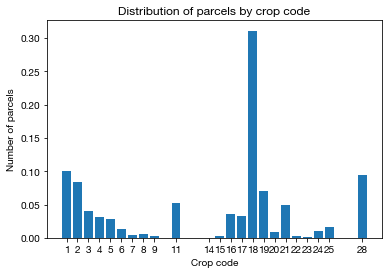

In [16]:
plt.bar(code_distr.reset_index()['code'], code_distr.reset_index()[0])
plt.xlabel('Crop code')
plt.ylabel('Number of parcels')
plt.xticks(code_distr.reset_index()['code'])
plt.title('Distribution of parcels by crop code')
plt.show()

## Plot by area

In [20]:
rpg.iloc[0]['geometry'].area

26793.211870524858

In [21]:
rpg['area'] = rpg['geometry'].apply(lambda x: x.area)

In [22]:
rpg.head()

,ID_PARCEL,SURF_PARC,CODE_CULTU,CODE_GROUP,CULTURE_D1,CULTURE_D2,geometry,code,area
0,38812,2.68,ORH,3,None,None,"POLYGON ((849735.439 6550875.519, 849737.060 6...",3,26793.211871
1,38905,20.49,BTH,1,None,None,"POLYGON ((849968.343 6550277.717, 850033.702 6...",1,204930.480450
2,38801,1.49,ORH,3,None,None,"POLYGON ((836239.463 6541366.745, 836239.010 6...",3,14917.485525
3,38816,0.27,SOG,4,None,None,"POLYGON ((836672.766 6542164.668, 836609.069 6...",4,2703.639982
4,38907,0.19,J6S,11,None,None,"POLYGON ((837134.128 6542614.464, 837103.154 6...",11,1911.939187


In [23]:
area_distr = rpg[['code', 'area']].groupby('code').sum() / rpg['area'].sum()

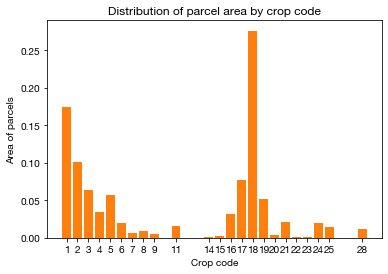

In [28]:
plt.bar(area_distr.reset_index()['code'], area_distr.reset_index()['area'], color='C1')
plt.xlabel('Crop code')
plt.ylabel('Area of parcels')
plt.xticks(area_distr.reset_index()['code'])
plt.title('Distribution of parcel area by crop code')
plt.show()

# Ilots?

In [2]:
ilots = gpd.read_file('../data/parcels/france/RPG_2-0__SHP_LAMB93_FR-2018_2018-01-15/RPG/1_DONNEES_LIVRAISON_2018/RPG_2-0_SHP_LAMB93_FR-2018/ILOTS_ANONYMES.shp')

In [3]:
ilots.head()

,ID_ILOT,geometry
0,14927,"POLYGON ((837428.604 6543303.548, 837360.147 6..."
1,49791,"POLYGON ((837449.772 6542925.159, 837451.292 6..."
2,14928,"POLYGON ((837063.826 6544536.580, 837063.861 6..."
3,14929,"POLYGON ((837656.155 6544701.507, 837635.224 6..."
4,35302,"POLYGON ((837353.613 6546303.662, 837579.214 6..."


In [4]:
ilots.shape

(5929902, 2)